In [3]:
# race_id = '2fd9dc4a-bcd4-43e6-bca4-5e5f076c14f3'
# race_id = '54e67de2-617e-4bcb-9628-2538ca0cae3d'
race_id = 'df689ce4-a380-4c98-bb62-cc5cee598d06'

from os import path
from cache import ensuredir
from moveSelectionStrategy import MoveSelectionStrategies
from heuristics_improvement import HeuristicRunData, Basic, ImprovementHeuristic, Taboo
import matplotlib.pyplot as plt

run_minutes = 0.5
t_run_max = 60*run_minutes
n_runs_per_improver = 2

ensuredir('races')
runs_dir = path.join('races', race_id)
ensuredir(runs_dir)

In [7]:
from cache import cache_list_dir, load


races = cache_list_dir(runs_dir)

race_datas: dict[str, dict[str, HeuristicRunData]] = {
    i: {} for i in races
}

for race in races:
    print(f"Race {race}:\n")
    race_dir = path.join(runs_dir, race)
    runs = cache_list_dir(race_dir)
    for run in runs:
        run_file = path.join(race_dir, run, 'run_data')
        race_datas[race][run] = load(run_file)
        print(race_datas[race][run].best)
        print()

Race 0:

Loaded: 'cache\races\df689ce4-a380-4c98-bb62-cc5cee598d06\0\annealing_10\run_data.pickle'.
    |  0   1   2   3   4   5   6   7   8   9  10  11  12 | 9198.41 ✔
M1: |  0   3   7   8  11  26  29  33  38  41             | 1410.00 (15%)
M2: | 10  13  16  20  21  31  34  36  42  44  45         | 361.00  (4%)
M3: |  2   4  15  17  18  19  25  27  28  30  37  39  40 | 3828.29 (42%)
M4: |  1   5   6   9  12  14  22  23  24  32  35  43     | 3599.12 (39%)

Loaded: 'cache\races\df689ce4-a380-4c98-bb62-cc5cee598d06\0\annealing_100\run_data.pickle'.
    |  0   1   2   3   4   5   6   7   8   9  10  11  12 | 8975.82 ✔
M1: |  3   4   6  11  12  16  19  24  35  37  45         | 1456.50 (16%)
M2: |  8  13  14  15  18  29  30  40  43  44             | 1219.50 (14%)
M3: |  0   1   5   7   9  17  22  23  25  27  33  38  42 | 3798.12 (42%)
M4: |  2  10  20  21  26  28  31  32  34  36  39  41     | 2501.71 (28%)

Loaded: 'cache\races\df689ce4-a380-4c98-bb62-cc5cee598d06\0\annealing_25\run_data.pic

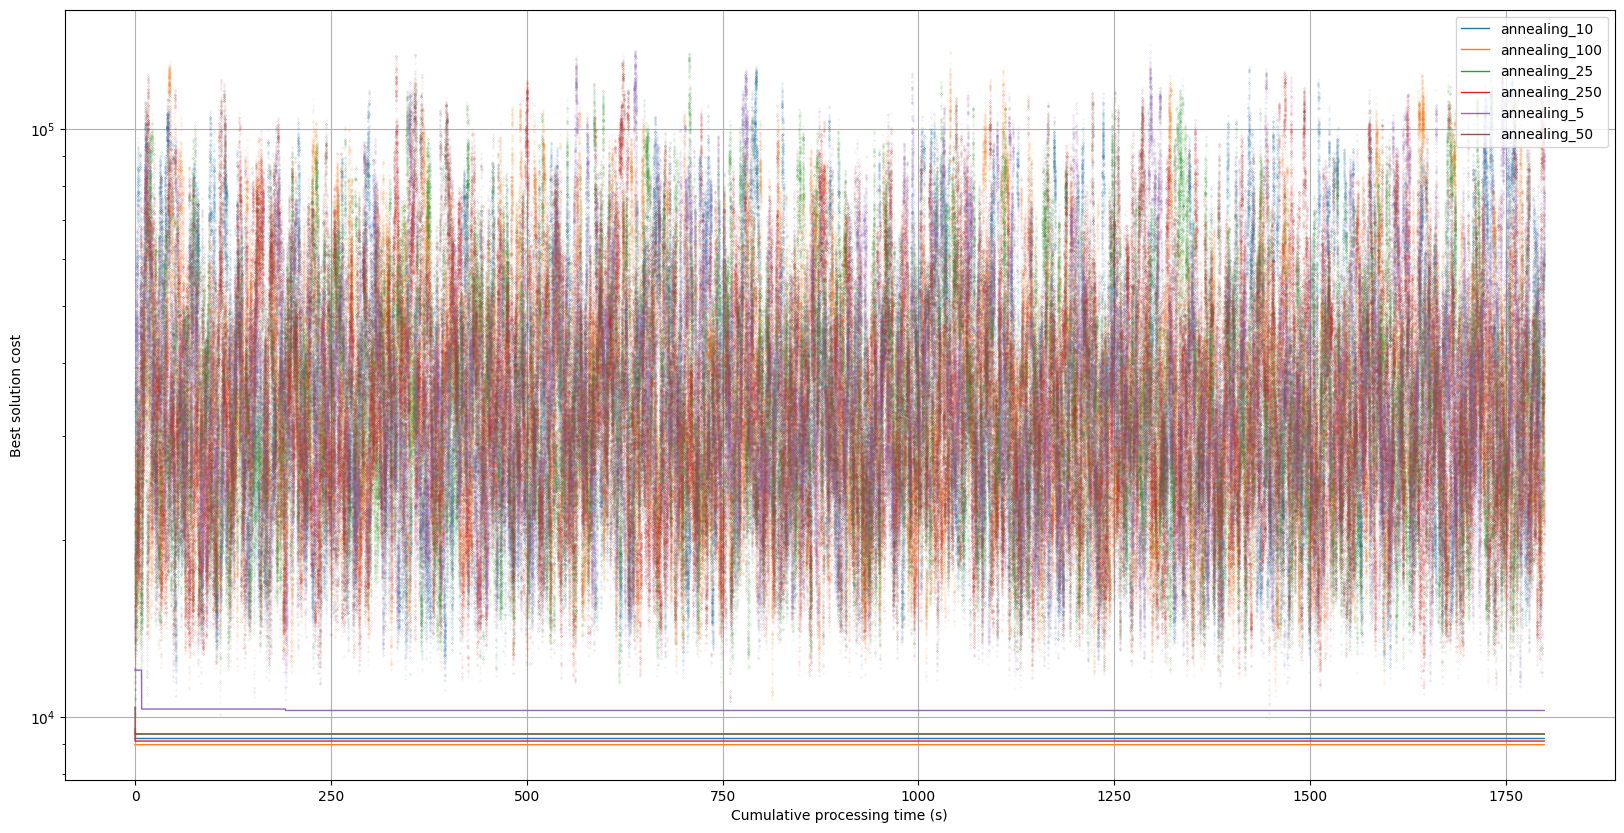

In [11]:
plt.figure(figsize=(20,10))

for race_i, race_data in race_datas.items():
    
    if race_i == '1':
        break
    
    for run, run_data in race_data.items():
        
        # Calculate running best
        running_best_cost = []
        for i in run_data.iterations:
            if len(running_best_cost) < 1 or i.cost < running_best_cost[-1]:
                running_best_cost.append(i.cost)
            else:
                running_best_cost.append(running_best_cost[-1])

        # color = color=next(plt.gca()._get_lines.prop_cycler)['color']
        line = plt.plot([iter.time for iter in run_data.iterations], [iter.cost for iter in run_data.iterations], '.', markersize = .2, alpha = .5)[0]
        plt.plot([iter.time for iter in run_data.iterations], running_best_cost, linewidth = 1, alpha = 1, label = f'{run}', color = line.get_color())
        
        
plt.xlabel('Cumulative processing time (s)')
plt.ylabel('Best solution cost')
plt.grid()
plt.legend(loc = 'upper right')
plt.yscale('log')
# plt.xscale('log')
plt.show()